 Free energy tutorial exercises from:
 "A tutorial on the free-energy framework for modelling perception and learning". Bogacz, 2017.
 DOI: 10.1016/j.jmp.2015.11.003

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randint
import scipy.integrate as integrate
import seaborn as sns

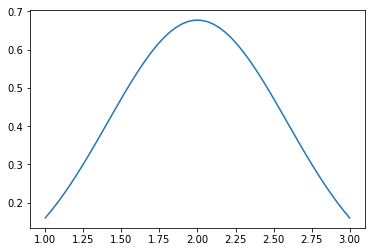

In [120]:
# Density of a normal (gaussian) distribution
def normal_distribution(x,mean,var):
    p = (1/np.sqrt(2*np.pi*var)) * np.exp(-((x-mean)**2)/(2*var))
    return p

x = np.linspace(1,3,50)
mean = np.mean(x)
var = np.var(x)
p = normal_distribution(x,mean,var)
plt.plot(x,p)

In [122]:
# object sizes
v = np.linspace(0.01,5,400)

# light intensity observed by the animal 
u = 2 

# level of noise in the animal's receptor
var_u = 1

# mean intensity is equal to size^2
mean_u = v**2

# prior expectations of object size
prior_size_mean = 3

prior_size_var = 1

In [123]:
## wrong solution with attempt to integrate using .quad

# def likelihood(u,mean_u,var_u):
#     likelihood = normal_distribution(u,mean_u,var_u)
#     return likelihood

# def calc_posterior(u,v,prior_size_mean,prior_size_var,var_u):
    
#     posterior = []
    
#     for i in range(0,v.size):
#         prior_v = normal_distribution(v[i],prior_size_mean,prior_size_var)
#         likelihood_vu = likelihood(u,mean_u[i],var_u)
        
#         #marginal_u = integrate.quad(lambda v: likelihood(u,mean_u[i],var_u),v[0],v[-1])
#         #marginal_u = integrate.quad(lambda v: normal_distribution(u,mean_u[i],var_u),v[0],v[-1])
#         #marginal_u = marginal_u[0]
        
#         # instead of integrating we can sum all the probability over intervals in v
#         marginal_u = 
        
#         posterior.append(prior_v * likelihood_vu / marginal_u)
#         #posterior = prior_v * likelihood_vu / marginal_u
#         #print(posterior)
                       
#     return posterior

In [124]:
def calc_posterior(u,v,prior_size_mean,prior_size_var,var_u):

    prior_v = normal_distribution(v,prior_size_mean,prior_size_var)
    likelihood_vu = normal_distribution(u,v**2,var_u)
    numerator = prior_v * likelihood_vu
    denominator = np.sum(numerator * (v[1]-v[0]))
    posterior = numerator/denominator
    
    return posterior

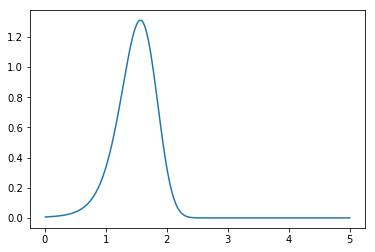

In [125]:
posterior = calc_posterior(u,v,prior_size_mean,prior_size_var,var_u)
plt.plot(v,posterior)


<function matplotlib.pyplot.show>

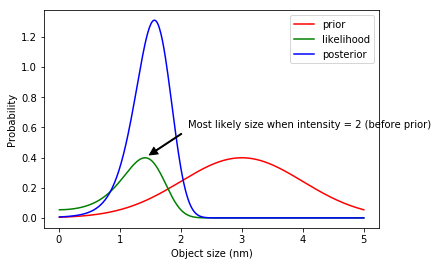

In [126]:
# illustration of how prior expectations can be integrated with likelihood to give posterior

prior_v = normal_distribution(v,prior_size_mean,prior_size_var)
likelihood_vu = normal_distribution(u,v**2,var_u)
posterior = calc_posterior(u,v,prior_size_mean,prior_size_var,var_u)

line1 = plt.plot(v,prior_v,'r')
line2 = plt.plot(v,likelihood_vu,'g')
line3 = plt.plot(v,posterior,'b')
plt.xlabel('Object size (nm)')
plt.ylabel('Probability')
plt.legend(['prior','likelihood','posterior'])

label1 = normal_distribution(u,u,var_u)

plt.annotate('Most likely size when intensity = 2 (before prior)', xy = (np.sqrt(u),label1), xytext=(np.sqrt(u)+0.7,label1+0.2),
              arrowprops=dict(facecolor='black',width =1, headwidth = 8,headlength = 8, shrink=0.1),
              )

plt.show

In [127]:
# Calculating the denominator is difficult for biological systems, because it requires integration.
# The posterior is also not normally distributed, so it cant be easily represented. 
# But what if there is a simpler method? 
# Maybe instead of the entire posterior distribution we can find just its maximum value.

# To find the max of posterior distribution we can maximise just the likelihood, 
# because the denominator does not depend on object size (really?)

# lets set most likely size of object to the prior mean
f = [prior_size_mean]

# F denotes the natural logarithm of the likelihood (log likelihood). 
# Its maximum is the same as max of likelihood p(f|u)
F = np.log(normal_distribution(f[0],prior_size_mean,prior_size_var)) + np.log(normal_distribution(u,f[0]**2,var_u))

# We can compute the derivative of F with respect to f. Since our function of intensity from size is u = v^2,
# this is the equation
df = (prior_size_mean - f[0])/prior_size_var + (u-(f[0]**2))/var_u * 2*f[0]


In [128]:
# Perform gradient ascent

learning_rate = 0.01
timesteps = np.arange(0,5,0.01).size
f = np.zeros((timesteps,1))
df = np.zeros((timesteps,1))
f[0] = prior_size_mean

for i in range(1,timesteps):
    df = (prior_size_mean - f[i-1])/prior_size_var + (u-(f[i-1]**2))/var_u * 2*f[i-1]
    f[i] = f[i-1] + df*learning_rate
    

Likelihood is max at v = f = [1.56746837]


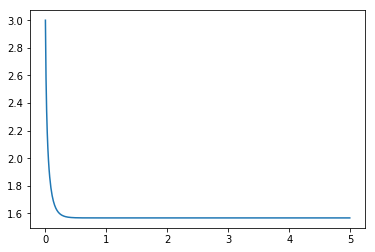

In [129]:
x = np.arange(0,5,0.01)
plt.plot(x,f)
vmax = f[-1]
print('Likelihood is max at v = f = ' + str(vmax))

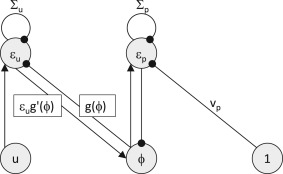

In [130]:
# It turns out that the gradient df is equal to the normalised prediction errors in u and v!
# Now finding the maximum is an easier problem

learning_rate = 0.01
timesteps = np.arange(0,5,0.01).size
f = np.zeros((timesteps,1))
#df = np.zeros((timesteps,1))
f[0] = prior_size_mean

errp = np.zeros((timesteps,1))
erru = np.zeros((timesteps,1))

for i in range(1,timesteps):
    f[i] = f[i-1] + learning_rate*((erru[i-1] * (2*f[i-1])) - errp[i-1])
    errp[i] = errp[i-1] + learning_rate*((f[i-1] - prior_size_mean) - (prior_size_var * errp[i-1]))
    erru[i] = erru[i-1] + learning_rate*((u - (f[i-1]**2)) - (var_u * erru[i-1]))

Likelihood is max at v = f = [1.55183492]


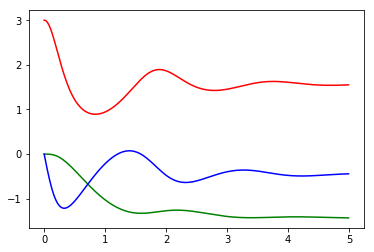

In [131]:
x = np.arange(0,5,0.01)
plt.plot(x,f,'r')
plt.plot(x,errp,'g')
plt.plot(x,erru,'b')
plt.show
vmax = f[-1]
print('Likelihood is max at v = f = ' + str(vmax))

In [117]:
# We can also update prior mean and variance, as well as the variance of intensity perception based on experience.
# That would mean maximising p(u) which is a complex integration problem
# However, instead we can max joint p(f,u) which is the same as p(f)p(u|f)
# Analogous to previous section we can max F which is log of prior + log likelihood

# In addition, previously we assumed that u(v) is simply v**2. But the function of data from hidden state can be 
# different, and we also may want to update it. 

In [226]:
# In the final exercise, it is demonstrated that the covariance matrix can be computed locally with
# an addition inhibitory interneuron

def simulate_net(f,gf,var,time_units):
    
    timesteps = np.arange(0,time_units,0.01).size
    
    learning_rate = 0.01
    
    inhibitor = np.zeros((timesteps,1))
    inhibitor[0] = 0
    
    error = np.zeros((timesteps,1))
    error[0] = 0
    
    for i in range(1,timesteps):
        
        error[i] = error[i-1] + learning_rate * (f - gf - inhibitor[i-1])
        inhibitor[i] = inhibitor[i-1] + learning_rate * (var * error[i-1] - inhibitor[i-1])
    
    return error[-1],inhibitor[-1]

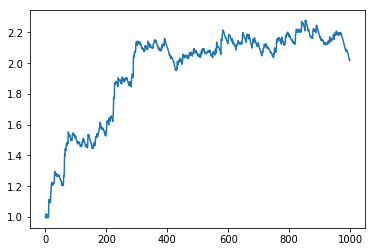

In [260]:
trials = 1000
var = np.zeros((trials,1))
var[0] = 1
gf = 5
time_units = 20

for i in range(1,trials):
    
    f = np.random.normal(5,np.sqrt(2))
    #f = 5 + np.sqrt(2) * np.random.normal()

    error,inhibitor = simulate_net(f,gf,var[i-1],time_units)
    #print(error[-1])
    
    var[i] = var[i-1] + learning_rate * (error * inhibitor - 1)

plt.plot(var)